# Analysis of umbrella sampling data for BMC hexamer tile interactions

related to the following paper:

#### Polymorphic in vitro assembly of a bacterial microcompartment shell protein
*Timothy K. Chiang, Alexander Jussupow, Antonino Caliò, Megan C. Gruenberg Cross, Wilson Tao, Kyleigh L. Range,
Arinita Pramanik, Aimee Chi Soe, Kristin N. Parent, Greg L. Hura, Paul D. Ashby, Michael Feig, Markus Sutter, Cheryl
A. Kerfeld*

Requirements:
- matplotlib>=3.10
- scipy>=1.16
- numpy>=2.0
- pandas>=2.2
- mdtraj>=1.11
- gemmi>=0.7
- pymbar>=4.0

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](
  https://colab.research.google.com/github/feiglab/bmc/blob/main/notebooks/H_H_umbrella_analysis.ipynb
)


In [1]:
import sys, os, subprocess
from pathlib import Path

if "google.colab" in sys.modules:
    repo_dir = Path("/content/bmc")
    if not repo_dir.exists():
        !git clone https://github.com/feiglab/bmc.git /content/bmc
    %cd /content/bmc
    %pip install -r "requirements.txt"
    
root = Path.cwd()
if not (root / "src").exists():
    root = root.parent
sys.path.insert(0, str(root / "src"))

In [2]:
from tileanalysis import process_umbrella
from tileanalysis import plot2D_combined, plot1D_combined
from tileanalysis import tics, minmax

## Edge-edge interaction

In [3]:
datadir=str(root)+"/data/H_H/edge_edge"

In [4]:
skip=50  # number of frames to skip for each umbrella to allow equilibration

In [5]:
data0 = process_umbrella('hh',dir=datadir+"/0mM",biasval='xbias', skip=skip)
data100 = process_umbrella('hh',dir=datadir+"/100mM",biasval='xbias', skip=skip)
data500 = process_umbrella('hh',dir=datadir+"/500mM",biasval='xbias', skip=skip)

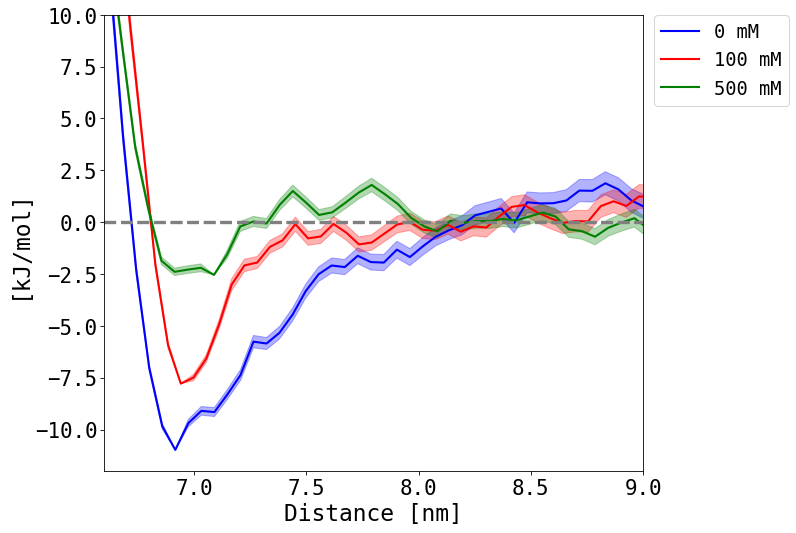

In [6]:
minmax['dist']=[6.6, 9.0]
tics['dist']=[6.0,6.5,7.0,7.5,8.0,8.5,9.0]

plot1D_combined([data0,data100,data500],'dist',usembar=True,minmax=minmax,
                matchflat=[8.0,8.5], matchzero=True, horizontal=0, fmin=-12, fmax=10,
                key=['0 mM','100 mM','500 mM'])

## Stacking interaction

In [7]:
datadir=str(root)+"/data/H_H/stacking"

## 'Inside'-'Outside'

In [8]:
data0_zio = process_umbrella('hh',dir=datadir+"/zio/0mM",biasval='zbias',skip=skip)
data100_zio = process_umbrella('hh',dir=datadir+"/zio/100mM",biasval='zbias',skip=skip)
data500_zio = process_umbrella('hh',dir=datadir+"/zio/500mM",biasval='zbias',skip=skip)

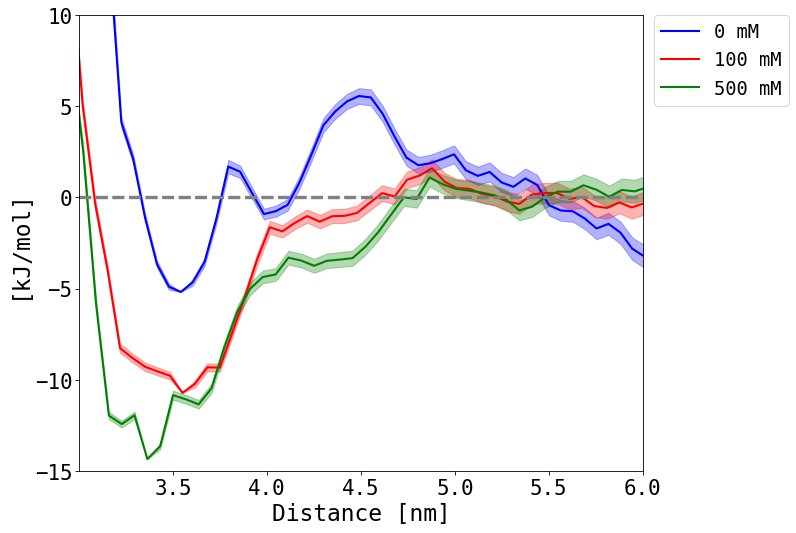

In [9]:
minmax['dist']=[3.0,6.0]
tics['dist']=[3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

plot1D_combined([data0_zio,data100_zio,data500_zio],'dist',minmax=minmax,tics=tics,usembar=True,
                matchflat=[5.2,5.7],matchzero=True, horizontal=0, fmin=-15,fmax=10,
                key=['0 mM','100 mM','500 mM'])

## 'Inside'-'Inside'

In [10]:
data0_zii = process_umbrella('hh',dir=datadir+"/zii/0mM",biasval='zbias',skip=skip)
data100_zii = process_umbrella('hh',dir=datadir+"/zii/100mM",biasval='zbias',skip=skip)
data500_zii = process_umbrella('hh',dir=datadir+"/zii/500mM",biasval='zbias',skip=skip)

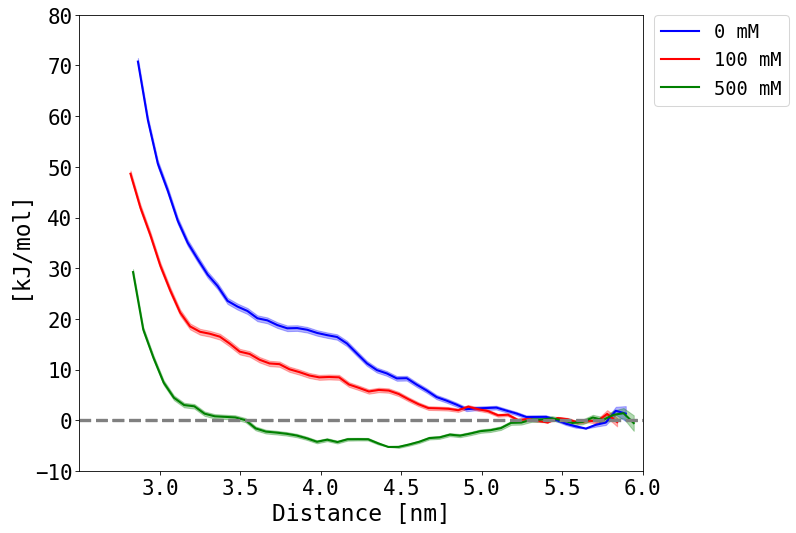

In [11]:
minmax['dist']=[2.5,6]
tics['dist']=[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

plot1D_combined([data0_zii, data100_zii, data500_zii],'dist',minmax=minmax,tics=tics,usembar=True,
                matchflat=[5.2,5.7], matchzero=True, horizontal=0, fmin=-10,fmax=80,
                key=['0 mM','100 mM','500 mM'])

## 'Outside'-'Outside'

In [12]:
data0_zoo = process_umbrella('hh',dir=datadir+"/zoo/0mM",biasval='zbias',skip=skip)
data100_zoo = process_umbrella('hh',dir=datadir+"/zoo/100mM",biasval='zbias',skip=skip)
data500_zoo = process_umbrella('hh',dir=datadir+"/zoo/500mM",biasval='zbias',skip=skip)

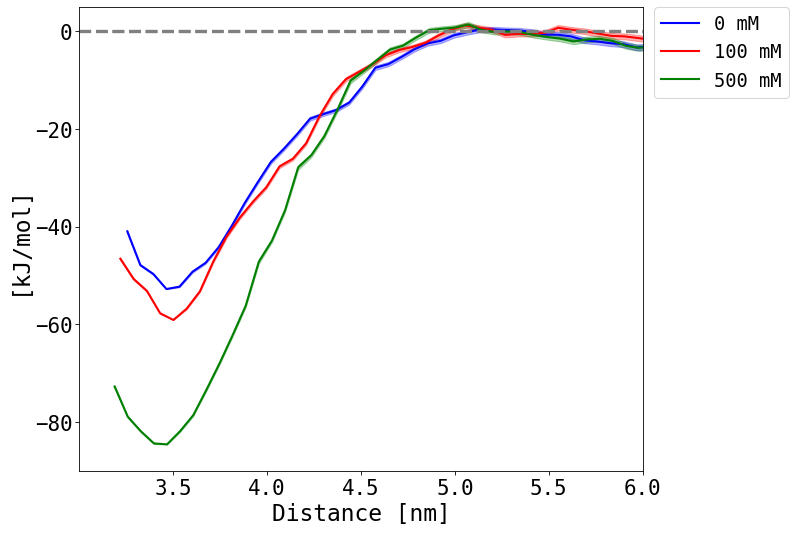

In [13]:
minmax['dist']=[3.0,6.0]
tics['dist']=[3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

plot1D_combined([data0_zoo, data100_zoo, data500_zoo],'dist',minmax=minmax,tics=tics,usembar=True,
                matchflat=[5.0,5.5], matchzero=True, horizontal=0, fmin=-90, fmax=5,
                key=['0 mM','100 mM','500 mM'])